# Algorytm Monte Carlo - estymacja liczby π

## Projekt przygotowany przez Izabelę Karczewską
### Import potrzebnych biblioteki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
np.random.seed(46)

### Funkcje
#### Przygotowuję trzy funkcje, które ułatwią mi obliczenia i rysowanie wykresów. 
1. Funkcja **generate_points** generująca punkty na określonym obszarze

In [3]:
def generate_points(n, r=1):
    x = np.random.uniform(0, r, n)
    y = np.random.uniform(0, r, n)
    return pd.DataFrame({"X":x, "Y":y})

2. Funkcja **points_in_circle** która:
   * sprawdza które punkty są w obrębie koła o zadanym promieniu
   * na podstawie tego modyfikuje wejściową tablicę ustawiając wartość nowej kolumny na 0 lub 1

In [4]:
def points_in_circle(points, r = 1):
    points["In_circle"] = points["Y"]  <= np.sqrt(r ** 2 - points["X"] ** 2)
    return points

3. Funkcja **estimate_pi** wylicza estymowaną wartość liczby pi

In [5]:
def estimate_pi(points):
    n = len(points)
    n_inside = len(points[points["In_circle"]==1])
    return 4*n_inside/n

4. Funcja **drawing_function**, w której za pomocą różnicy w kolorach zaznaczam, które punkty leżą wewnątrz okręgu, a które poza nim. Dodatkowo rysuję linię okręgu, aby widzieć granicę tych dwóch obszarów.

In [6]:
def drawing_function(ax, points, n, pi):
    x_circle = np.linspace(0, 1, num=100)
    y_circle = np.sqrt(1 - x_circle**2)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f'Liczba punktów - {n}, π ≈ {pi:.4f}', fontsize=15)
    sns.scatterplot(data=points, x="X", y="Y", ax=ax, hue="In_circle", palette="spring")
    sns.lineplot(x=x_circle, y=y_circle, ax=ax, color="black", linewidth=2)
    ax.legend(title="Czy w obrębie koła?", loc="upper right", labels=["Tak", "Nie"])

### Wizualizacja wylosowanych punktów
Losuję punkty, obliczam wartość π oraz wyświetlam wykresy dla konkretnej liczby punktów **n**:
* n = 100
* n = 1000
* n = 100000

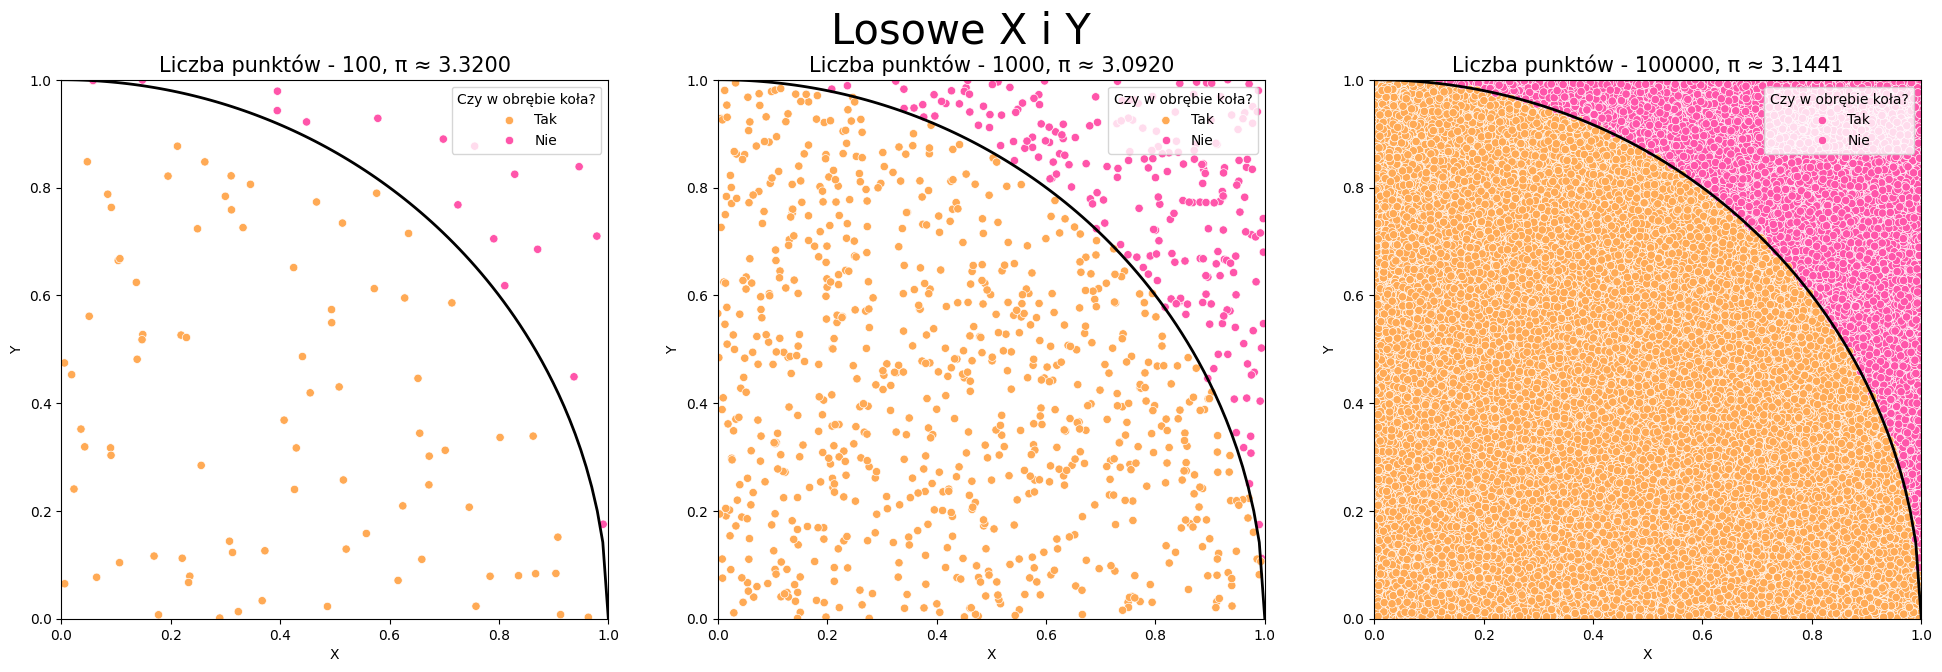

In [7]:
fig, ax = plt.subplots(1,3, figsize = (24,7))
fig.suptitle("Losowe X i Y", fontsize = 30)
n = [100, 1000, 100000]

for i, n_val in enumerate(n):
    points = generate_points(n_val)
    points_circle = points_in_circle(points)
    pi = estimate_pi(points_circle)
    drawing_function(ax[i], points_circle, n_val, pi)

### Różnice pomiędzy wyestymowanymi wartościami pi a wartością rzeczywistą

Text(0.5, 1.0, 'Błąd w oszacowaniu liczby π w zależności od n - jedna seria')

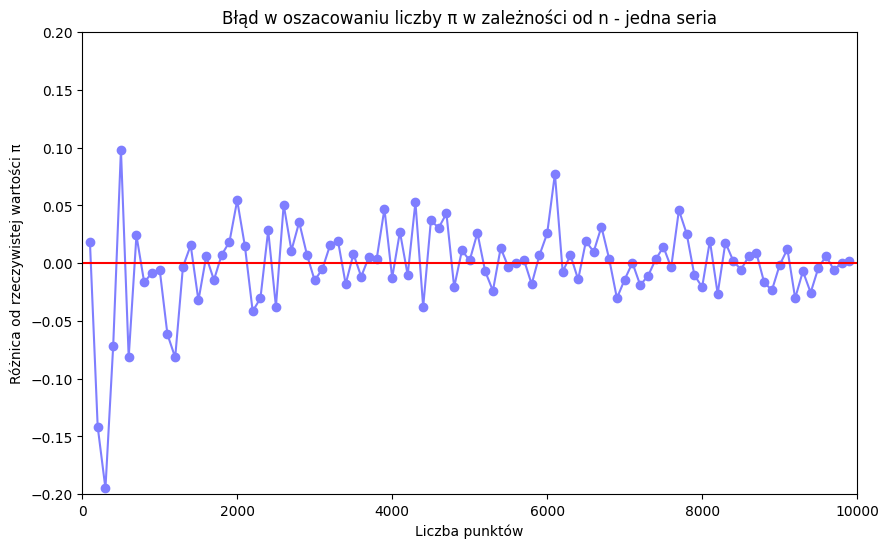

In [8]:
n_values = range(100, 10000, 100)
pi_estimates = []

for n in n_values:
    points = generate_points(n)
    points = points_in_circle(points)
    pi = estimate_pi(points)
    pi_estimates.append(pi)

real_pi = np.pi
differences = [estimate - real_pi for estimate in pi_estimates]

plt.figure(figsize=(10, 6))
plt.plot(n_values, differences, marker='o', color="#7F7EFF")
plt.axhline(y=0, color='r')
plt.xlabel('Liczba punktów')
plt.ylabel('Różnica od rzeczywistej wartości π')
plt.xlim(-0.5,10000)
plt.ylim(-0.2, 0.2)
plt.title('Błąd w oszacowaniu liczby π w zależności od n - jedna seria')

### Chwilowa estymowana wartość π wraz ze wzrostem ilości losowań

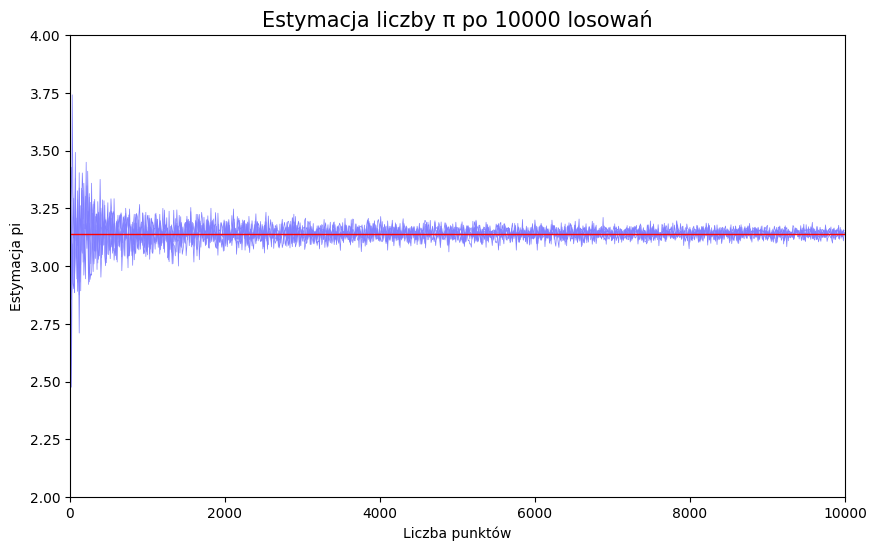

In [9]:
plt.figure(figsize=(10, 6))
plt.title("Estymacja liczby π po 10000 losowań", fontsize=15)
plt.xlim(0,10000)
plt.ylim(2,4)
plt.xlabel("Liczba punktów")
plt.ylabel("Estymacja pi")

n_values = range(0, 10000, 10)
for _ in range(0,5):
    y_pi = []
    for n in range(1, 10001, 10):
        points = generate_points(n)
        points = points_in_circle(points)
        pi = estimate_pi(points)
        y_pi.append(pi)
    plt.plot(n_values,y_pi, color="#7F7EFF", linewidth=0.5)
plt.axhline(y = np.pi, color = 'r', linewidth=1) 
plt.show()

### Obliczenie błędu średniokwadratowego
Obliczam MSE dla różnych liczebności punktów **(n_values)** stosując 10 serii. Pozwoli to na lepszą ocenę zależności dokładności wyliczeń od liczby punktów niż liczenie pojedynczych błędów. 

Text(0.5, 1.0, 'Błąd średniokwadratowy w oszacowaniu liczby π w zależności od liczby punktów')

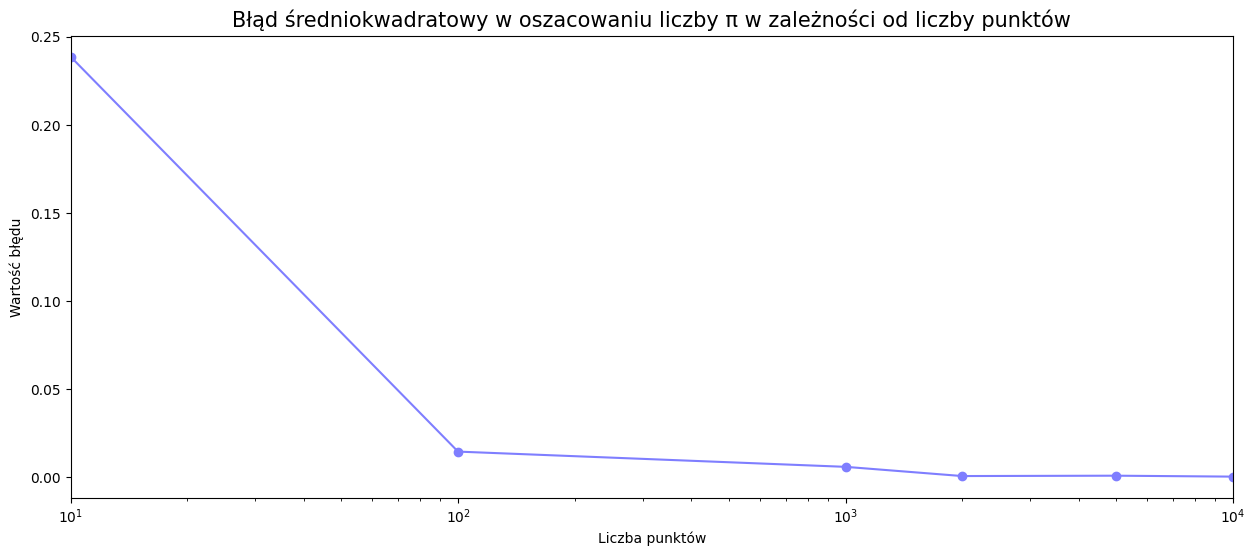

In [10]:
n_values = [10, 100, 1000, 2000, 5000, 10000]
real_pi = np.pi
pi_errors_in_series = []
mean_squared_errors = []
series_errors=[]

for _ in range(0, 10):
    pi_errors_in_series = []
    for n in n_values:
        points = generate_points(n)
        points = points_in_circle(points)
        pi = estimate_pi(points)
        pi_errors_in_series.append((pi-real_pi)**2)
    series_errors.append(pi_errors_in_series)

for i in range(0, len(n_values)):
    mean_squared_errors.append(np.mean([error[i] for error in series_errors]))

plt.figure(figsize=(15, 6))
plt.plot(n_values, mean_squared_errors, marker='o', color="#7F7EFF")
plt.xscale('log')
plt.xlim(n_values[0], n_values[-1])
plt.xlabel('Liczba punktów')
plt.ylabel('Wartość błędu')
plt.title('Błąd średniokwadratowy w oszacowaniu liczby π w zależności od liczby punktów', fontsize=15)

### Rozkład estymacji liczby π w zależności od liczby punktów, 10 serii

Text(0.5, 1.0, 'Estymacja liczby π po 10 seriach')

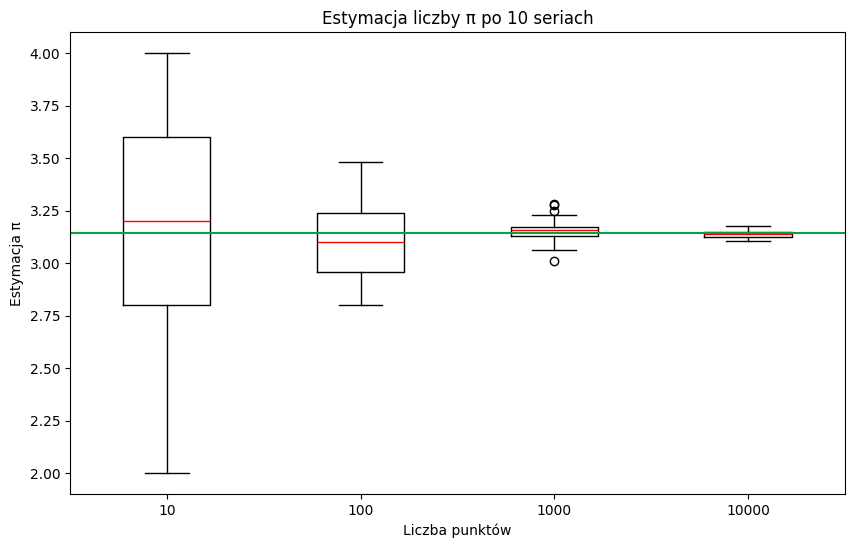

In [11]:
n_values = [10, 100, 1000, 10000]
pi_in_series = {n: [] for n in n_values}

for _ in range(0, 50):
    for n in n_values:
        points = generate_points(n)
        points = points_in_circle(points)
        pi = estimate_pi(points)
        pi_in_series[n].append(pi)

plt.figure(figsize=(10,6))
plt.boxplot([pi_in_series[n] for n in n_values], medianprops={'color': 'red'})
plt.axhline(np.pi, color='#08A045')
plt.xticks(range(1,len(n_values)+1), ['10', '100', '1000', '10000'])
plt.xlabel('Liczba punktów')
plt.ylabel('Estymacja π')
plt.title('Estymacja liczby π po 10 seriach')

## Wnioski
Zwiększając liczbę losowanych punktów powodujemy, że estymacja staje się dokładniejsza, a zakres naszych wartości stopniowo się zmniejsza. Potwierdzają to wszystkie przedstawione wizualizacje. 

#### Czy jesteśmy w stanie wzrokowo określić od jakiej wartości algorytm radzi sobie już dużo lepiej?

Możemy twierdzić, że już od n=1000 przybliżenie liczby π jest w miarę dokładne. Potwierdza to wykres błędu średniokwadratowego oraz wykres pudełkowy. Kolejny wniosek jaki możemy wyciągnąć jest taki, że od pewnej liczby punktów nie widać znaczącej poprawy w estymacji. Oznacza to, że zawsze pozostanie choćby minimalna niepewność co do wyniku.